# EDA Online Retail

## In this Program, you can see how we can have some new insights on online retail shops dataset by using python to make a Exploratory Data Analysis 

### First: Import the needed library

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format',lambda x: '%.5f' %x)

In [2]:
df = pd.read_csv("online_retail/online_retail.csv")
print(df.shape)

(1067371, 8)


### Second : Analyze the data information, such as the content, the field , the data type, and the null value(NA).

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom


In [4]:
df.describe()

,Quantity,Price,Customer ID
count,1067371.00000,1067371.00000,824364.00000
mean,9.93890,4.64939,15324.63850
std,172.70579,123.55306,1697.46445
min,-80995.00000,-53594.36000,12346.00000
25%,1.00000,1.25000,13975.00000
50%,3.00000,2.10000,15255.00000
75%,10.00000,4.15000,16797.00000
max,80995.00000,38970.00000,18287.00000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371.00000,9.93890,172.70579,-80995.00000,1.00000,3.00000,10.00000,80995.00000
Price,1067371.00000,4.64939,123.55306,-53594.36000,1.25000,2.10000,4.15000,38970.00000
Customer ID,824364.00000,15324.63850,1697.46445,12346.00000,13975.00000,15255.00000,16797.00000,18287.00000


In [6]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [7]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


### Third: Handling missing values (NA).

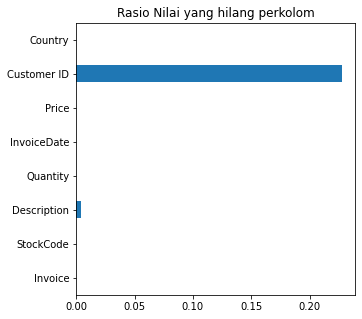

Detail Jumlah Nilai yang hilang perkolom:


Customer ID    243007
Description      4382
Invoice             0
StockCode           0
Quantity            0
InvoiceDate         0
Price               0
Country             0
dtype: int64

In [9]:
plt.figure(figsize=(5,5))
df.isnull().mean(axis=0).plot.barh()
plt.title("Rasio Nilai yang hilang perkolom")
plt.show()
print('Detail Jumlah Nilai yang hilang perkolom:')
df.isna().sum().sort_values(ascending=False)

In [10]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [11]:
df= df.dropna(subset=['Customer ID'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   Customer ID  824364 non-null  float64
 7   Country      824364 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.6+ MB


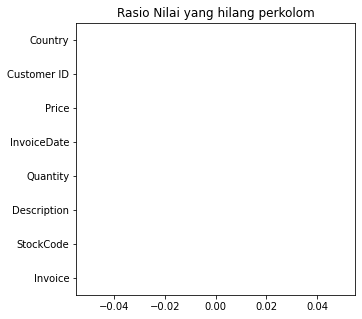

Detail Jumlah Nilai yang hilang perkolom:


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [13]:
plt.figure(figsize=(5,5))
df.isnull().mean(axis=0).plot.barh()
plt.title("Rasio Nilai yang hilang perkolom")
plt.show()
print('Detail Jumlah Nilai yang hilang perkolom:')
df.isna().sum().sort_values(ascending=False)

In [14]:
df.describe()

,Quantity,Price,Customer ID
count,824364.00000,824364.00000,824364.00000
mean,12.41457,3.67680,15324.63850
std,188.97610,70.24139,1697.46445
min,-80995.00000,0.00000,12346.00000
25%,2.00000,1.25000,13975.00000
50%,5.00000,1.95000,15255.00000
75%,12.00000,3.75000,16797.00000
max,80995.00000,38970.00000,18287.00000


In [15]:
df.duplicated().sum()

26479

In [16]:
df= df.drop(index=df[df.duplicated()].index)

In [17]:
df[df['Invoice'].astype(str).str[0]== 'C'].tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83000,14397.00000,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69000,15498.00000,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95000,15311.00000,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25000,17315.00000,United Kingdom
1067178,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25000,17315.00000,United Kingdom


In [18]:
df[(df.Quantity<1)].sort_values(by='StockCode').tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
325513,C521158,POST,POSTAGE,-1,2010-09-02 13:53:00,40.00000,12414.00000,Austria
371777,C525272,TEST001,This is a test product.,-1,2010-10-04 16:29:00,4.50000,16454.00000,United Kingdom
371778,C525273,TEST001,This is a test product.,-1,2010-10-04 16:30:00,4.50000,16454.00000,United Kingdom
371779,C525274,TEST001,This is a test product.,-1,2010-10-04 16:33:00,4.50000,12346.00000,United Kingdom
371780,C525275,TEST001,This is a test product.,-2,2010-10-04 16:38:00,4.50000,16446.00000,United Kingdom


In [19]:
print("Format Variabel InvoceDate adalah: ",df['InvoiceDate'].dtype)
print("*"*100)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("Format Variabel InvoiceDate:", df['InvoiceDate'].dtype)
df.head()

Format Variabel InvoceDate adalah:  object
****************************************************************************************************
Format Variabel InvoiceDate: datetime64[ns]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom


### Fourth: insert new variable by using feature engineering.

In [20]:
df['Years'] = df['InvoiceDate'].dt.year
df['Months'] = df['InvoiceDate'].dt.month
df['Days'] = df['InvoiceDate'].dt.dayofweek+1
df['Hours'] = df['InvoiceDate'].dt.hour
df['Date'] = df['InvoiceDate'].dt.date
df['DayOfMonth'] = df['InvoiceDate'].dt.day

df=df[['Invoice','InvoiceDate','Date','Years','Months',
      'Days','Hours','DayOfMonth','StockCode','Description',
       'Quantity','Price','Customer ID','Country']]
df.head()

,Invoice,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,Price,Customer ID,Country
0,489434,2009-12-01 07:45:00,2009-12-01,2009,12,2,7,1,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95000,13085.00000,United Kingdom
1,489434,2009-12-01 07:45:00,2009-12-01,2009,12,2,7,1,79323P,PINK CHERRY LIGHTS,12,6.75000,13085.00000,United Kingdom
2,489434,2009-12-01 07:45:00,2009-12-01,2009,12,2,7,1,79323W,WHITE CHERRY LIGHTS,12,6.75000,13085.00000,United Kingdom
3,489434,2009-12-01 07:45:00,2009-12-01,2009,12,2,7,1,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10000,13085.00000,United Kingdom
4,489434,2009-12-01 07:45:00,2009-12-01,2009,12,2,7,1,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25000,13085.00000,United Kingdom


In [21]:
df.insert(loc=14,column='TotalCost', value = df['Quantity']*df['Price'])
df.head()

,Invoice,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,Price,Customer ID,Country,TotalCost
0,489434,2009-12-01 07:45:00,2009-12-01,2009,12,2,7,1,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95000,13085.00000,United Kingdom,83.40000
1,489434,2009-12-01 07:45:00,2009-12-01,2009,12,2,7,1,79323P,PINK CHERRY LIGHTS,12,6.75000,13085.00000,United Kingdom,81.00000
2,489434,2009-12-01 07:45:00,2009-12-01,2009,12,2,7,1,79323W,WHITE CHERRY LIGHTS,12,6.75000,13085.00000,United Kingdom,81.00000
3,489434,2009-12-01 07:45:00,2009-12-01,2009,12,2,7,1,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10000,13085.00000,United Kingdom,100.80000
4,489434,2009-12-01 07:45:00,2009-12-01,2009,12,2,7,1,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25000,13085.00000,United Kingdom,30.00000


In [22]:
df.to_csv("retail_data_clean.csv",index=False)

In [23]:
data = pd.read_csv("retail_data_clean.csv")
data.head(3)

,Invoice,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,Price,Customer ID,Country,TotalCost
0,489434,2009-12-01 07:45:00,2009-12-01,2009,12,2,7,1,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95000,13085.00000,United Kingdom,83.40000
1,489434,2009-12-01 07:45:00,2009-12-01,2009,12,2,7,1,79323P,PINK CHERRY LIGHTS,12,6.75000,13085.00000,United Kingdom,81.00000
2,489434,2009-12-01 07:45:00,2009-12-01,2009,12,2,7,1,79323W,WHITE CHERRY LIGHTS,12,6.75000,13085.00000,United Kingdom,81.00000


## EDA

### Last : try to explore the data and analyze it to gain some insights.

In [24]:
data.groupby("StockCode").agg({"Quantity":"sum"}).sort_values(by="Quantity",ascending=False).head(10)

,Quantity
StockCode,
84077,103505
85099B,92223
21212,88836
85123A,88183
84879,77755
22197,76140
17003,69343
21977,54373
84991,52502


In [25]:
data.groupby("Description").agg({"Quantity":"sum"}).sort_values(by="Quantity",ascending=False).head(10)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,103505
WHITE HANGING HEART T-LIGHT HOLDER,88126
ASSORTED COLOUR BIRD ORNAMENT,77755
JUMBO BAG RED RETROSPOT,73033
BROCADE RING PURSE,69343
PACK OF 60 PINK PAISLEY CAKE CASES,54373
60 TEATIME FAIRY CAKE CASES,52502
PACK OF 72 RETRO SPOT CAKE CASES,44480
PACK OF 72 RETROSPOT CAKE CASES,44356


In [26]:
data['Country'].value_counts().head(10)

United Kingdom    716115
Germany            17339
EIRE               16014
France             13897
Netherlands         5137
Spain               3754
Belgium             3110
Switzerland         3058
Portugal            2414
Australia           1890
Name: Country, dtype: int64

In [27]:
print("Data Transaksi dari {} s/d {}".format(data['Date'].unique()[0],data['Date'].unique()[-1]))

Data Transaksi dari 2009-12-01 s/d 2011-12-09


In [28]:
ord_rev_month = pd.DataFrame({'Order':data.groupby('Invoice')['Months'].unique().value_counts().sort_index(),
                             'Revenue':data.groupby('Months')['TotalCost'].sum()})
ord_rev_month

,Order,Revenue
[1],2532,1004168.41200
[2],2537,923130.49600
[3],3526,1211995.52100
[4],2999,983230.50300
[5],3617,1204885.06000
[6],3540,1175647.07000
[7],3306,1133997.65100
[8],3091,1200337.55000
[9],4119,1707876.28300
[10],4849,1934827.12000


### After grouping of a specific field (month,day,date) you can see the order and revenue from respective field

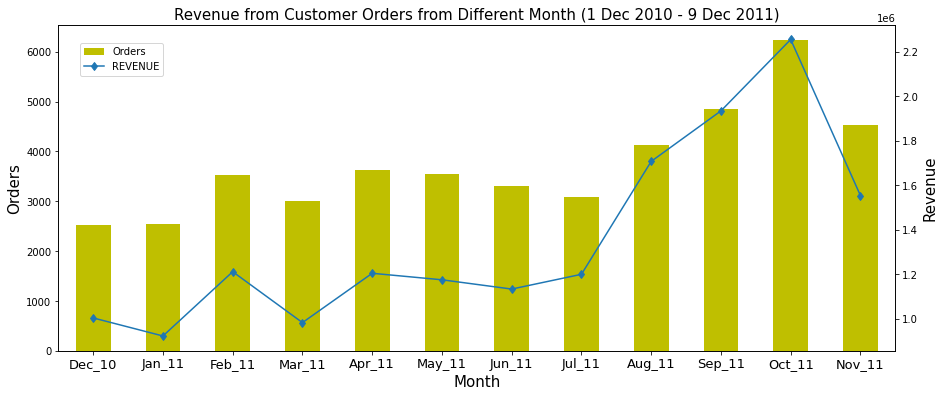

In [32]:
fig,axl = plt.subplots(figsize=(15,6))
ax1 = ord_rev_month['Order'].plot(kind='bar',color='y',label='Orders')
ax2 = ord_rev_month['Revenue'].plot(kind='line',marker='d',secondary_y=True,label='REVENUE')
ax1.set_xlabel('Month',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Revenue',fontsize=15)
ax1.set_title('Revenue from Customer Orders from Different Month (1 Dec 2010 - 9 Dec 2011)',fontsize=15)
ax1.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11',
                      'Jul_11','Aug_11','Sep_11','Oct_11','Nov_11'),rotation = 'horizontal',fontsize=13)
fig.legend(loc='upper left',bbox_to_anchor=(0.02,0.96),bbox_transform=ax1.transAxes)
plt.show()


#### By inserting a new field (Month) and grouping some other field , we now know what month

In [30]:
ord_rev_month.corr()

,Order,Revenue
Order,1.00000,0.96312
Revenue,0.96312,1.00000


In [34]:
data['Days'].describe()

count   797885.00000
mean         3.63278
std          1.94455
min          1.00000
25%          2.00000
50%          3.00000
75%          5.00000
max          7.00000
Name: Days, dtype: float64

In [35]:
ord_rev_day = pd.DataFrame({'Order':data.groupby('Invoice')['Days'].unique().value_counts().sort_index(),
                           'Revenue' : data.groupby('Days')['TotalCost'].sum()})
ord_rev_day



,Order,Revenue
[1],6987,2639177.88600
[2],8339,3055993.65200
[3],8043,2916470.00300
[4],9711,3524977.26200
[5],6602,2394340.70300
[6],30,9803.05000
[7],5164,1749228.73200


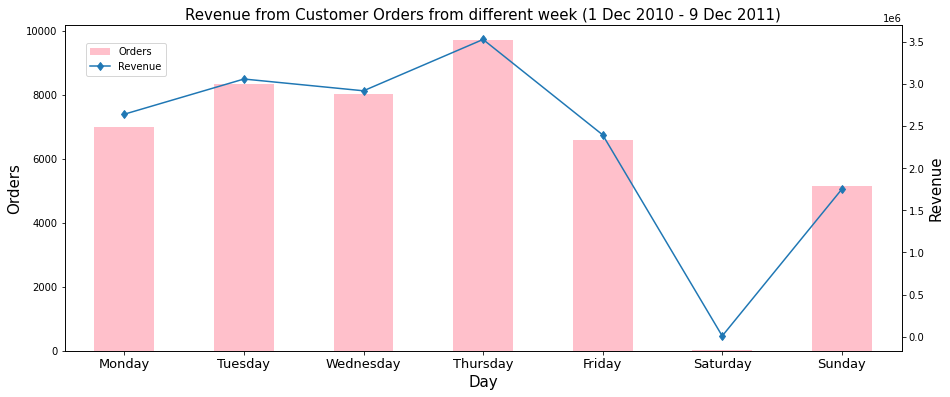

In [42]:
fig,axl = plt.subplots(figsize=(15,6))
ax1 = ord_rev_day['Order'].plot(kind='bar',color='pink',label='Orders')
ax2 = ord_rev_day['Revenue'].plot(kind='line',marker='d',secondary_y=True,label='Revenue')
ax1.set_xlabel('Day',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Revenue',fontsize=15)
ax1.set_title('Revenue from Customer Orders from different week (1 Dec 2010 - 9 Dec 2011)',fontsize=15)
ax1.set_xticklabels(('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
                      ),rotation = 'horizontal',fontsize=13)
fig.legend(loc='upper left',bbox_to_anchor=(0.02,0.96),bbox_transform=ax1.transAxes)
plt.show()

In [38]:
ord_rev_date = pd.DataFrame({'Order':data.groupby('Invoice')['DayOfMonth'].unique().value_counts().sort_index(),
                           'Revenue' : data.groupby('DayOfMonth')['TotalCost'].sum()})
ord_rev_date

,Order,Revenue
[1],1585,535034.10100
[2],1420,482806.46000
[3],1305,534732.85100
[4],1480,581895.66000
[5],1559,572884.21000
[6],1557,531786.31000
[7],1788,736671.93000
[8],1775,608775.57100
[9],1487,552619.96000
[10],1567,538171.77000


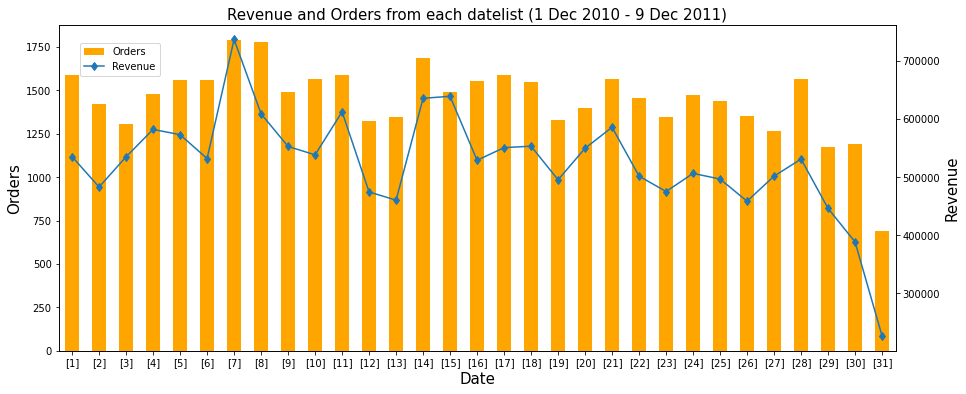

In [41]:
fig,axl = plt.subplots(figsize=(15,6))
ax1 = ord_rev_date['Order'].plot(kind='bar',color='orange',label='Orders')
ax2 = ord_rev_date['Revenue'].plot(kind='line',marker='d',secondary_y=True,label='Revenue')
ax1.set_xlabel('Date',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Revenue',fontsize=15)
ax1.set_title('Revenue and Orders from each datelist (1 Dec 2010 - 9 Dec 2011)',fontsize=15)
fig.legend(loc='upper left',bbox_to_anchor=(0.02,0.96),bbox_transform=ax1.transAxes)
plt.show()

### The country with most transaction viz

In [43]:
print("Jumlah Negara : ",data ['Country'].nunique())
print("List Negara: ")
n = 1
for i in data['Country'].unique():
    print("{}. {}".format(n,i))
    n+= 1

Jumlah Negara :  41
List Negara: 
1. United Kingdom
2. France
3. USA
4. Belgium
5. Australia
6. EIRE
7. Germany
8. Portugal
9. Japan
10. Denmark
11. Netherlands
12. Poland
13. Spain
14. Channel Islands
15. Italy
16. Cyprus
17. Greece
18. Norway
19. Austria
20. Sweden
21. United Arab Emirates
22. Finland
23. Switzerland
24. Unspecified
25. Nigeria
26. Malta
27. RSA
28. Singapore
29. Bahrain
30. Thailand
31. Israel
32. Lithuania
33. West Indies
34. Korea
35. Brazil
36. Canada
37. Iceland
38. Lebanon
39. Saudi Arabia
40. Czech Republic
41. European Community


In [53]:
df_country = pd.DataFrame({'Order':data.groupby('Invoice')['Country'].unique().value_counts().sort_index(),
                           'Revenue' : data.groupby('Country')['TotalCost'].sum()})
df_country.sort_values(by='Order',ascending=False).head(10)

,Order,Revenue
[United Kingdom],40505,13482505.08700
[Germany],1095,411959.16100
[France],738,320046.26000
[EIRE],727,573509.76000
[Netherlands],250,548330.70000
[Spain],188,91013.44000
[Belgium],183,63208.89000
[Sweden],128,87421.52000
[Portugal],122,50674.93000
[Switzerland],120,98779.41000


In [54]:
df_country['Percentage'] = (df_country['Revenue']/df_country['Revenue'].sum())*100
df_country.sort_values(by='Percentage', ascending=False).head(10)

,Order,Revenue,Percentage
[United Kingdom],40505,13482505.08700,82.76558
[EIRE],727,573509.76000,3.52063
[Netherlands],250,548330.70000,3.36606
[Germany],1095,411959.16100,2.52891
[France],738,320046.26000,1.96468
[Australia],117,166444.42000,1.02176
[Switzerland],120,98779.41000,0.60638
[Spain],188,91013.44000,0.55871
[Sweden],128,87421.52000,0.53666
[Denmark],53,64459.59000,0.39570


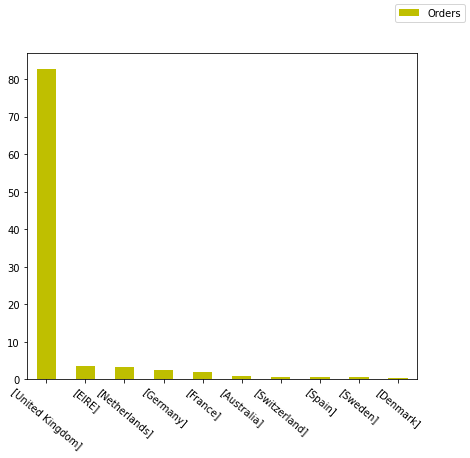

In [57]:
top_ten = df_country.sort_values(by='Percentage', ascending=False).head(10)
fig,axl = plt.subplots(figsize=(7,6))
top_ten['Percentage'].plot(kind='bar',color='y',label='Orders')
ax1.set_ylabel('Percentage',fontsize=15)
ax1.set_xlabel('Country',fontsize=15)
plt.xticks(rotation=365-45)
ax1.set_title('10 Country with the higest Spending',fontsize=15)
fig.legend(loc='upper right',bbox_transform=ax1.transAxes)
plt.show()

### Discount effect on company business value

In [59]:
months = ['january', 'february', 'march', 'april', 'may', 'june', 
          'july', 'august', 'september', 'october', 'november', 'december']

mon_rev = []
disc_count = []

for i in range(1,13):
    mon_rev.append(data[data['Months'] == i]['TotalCost'].sum())
    disc_count.append(data[(data['StockCode']=='D') &(data['Months'] == i)]['StockCode'].count())
    
disc_rev = pd.DataFrame({'monthly_revenue': mon_rev, 'num_of_disc': disc_count}, index=months)
disc_rev

,monthly_revenue,num_of_disc
january,1004168.41200,7
february,923130.49600,9
march,1211995.52100,10
april,983230.50300,7
may,1204885.06000,9
june,1175647.07000,16
july,1133997.65100,12
august,1200337.55000,23
september,1707876.28300,14
october,1934827.12000,16


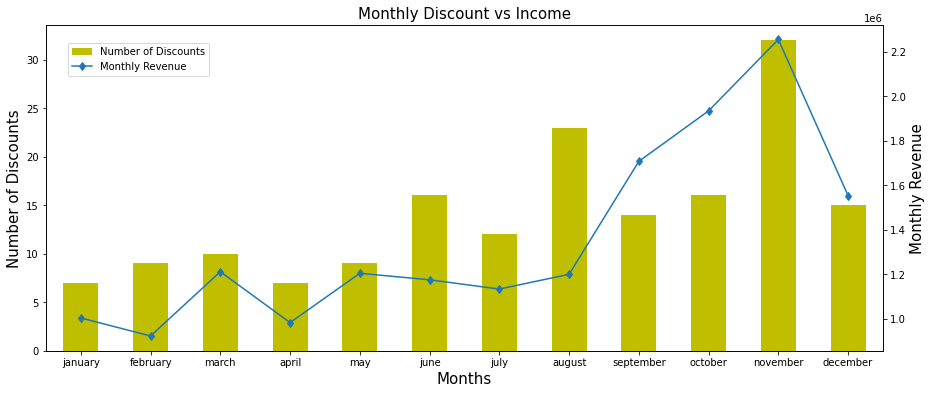

In [61]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = disc_rev['num_of_disc'].plot(kind='bar', color='y', label='Number of Discounts')
ax2 = disc_rev['monthly_revenue'].plot(kind='line', marker='d', secondary_y=True, label = 'Monthly Revenue')
ax1.set_xlabel('Months',fontsize=15)
ax1.set_ylabel('Number of Discounts',fontsize=15)
ax2.set_ylabel('Monthly Revenue',fontsize=15)
ax1.set_title('Monthly Discount vs Income',fontsize=15)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

<Figure size 432x432 with 0 Axes>

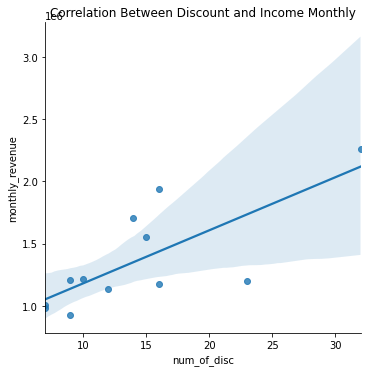

In [63]:
plt.figure(figsize=(6,6))
sns.lmplot(data = disc_rev, x = 'num_of_disc', y = 'monthly_revenue')
plt.title('Correlation Between Discount and Income Monthly')
plt.show()

In [65]:
disc_rev.insert(loc=2, column='num_of_order', 
                value=pd.Series(data.groupby('Invoice')['Months'].unique().value_counts().sort_index()).values)
disc_rev

,monthly_revenue,num_of_disc,num_of_order
january,1004168.41200,7,2532
february,923130.49600,9,2537
march,1211995.52100,10,3526
april,983230.50300,7,2999
may,1204885.06000,9,3617
june,1175647.07000,16,3540
july,1133997.65100,12,3306
august,1200337.55000,23,3091
september,1707876.28300,14,4119
october,1934827.12000,16,4849


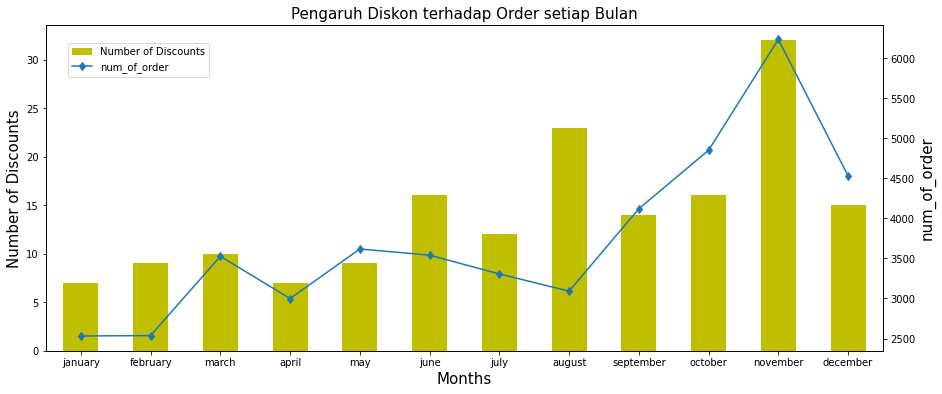

In [66]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = disc_rev['num_of_disc'].plot(kind='bar', color='y', label='Number of Discounts')
ax2 = disc_rev['num_of_order'].plot(kind='line', marker='d', secondary_y=True, label = 'num_of_order')
ax1.set_xlabel('Months',fontsize=15)
ax1.set_ylabel('Number of Discounts',fontsize=15)
ax2.set_ylabel('num_of_order',fontsize=15)
ax1.set_title('Pengaruh Diskon terhadap Order setiap Bulan',fontsize=15)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

<Figure size 432x432 with 0 Axes>

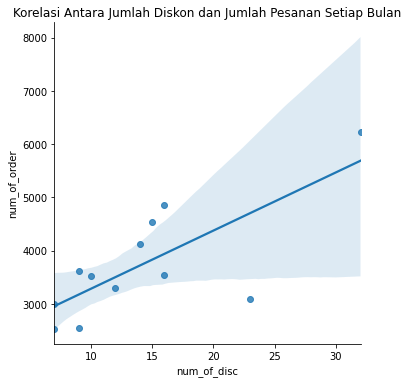

In [67]:
plt.figure(figsize=(6,6))
sns.lmplot(data = disc_rev, x = 'num_of_disc', y = 'num_of_order')
plt.title('Korelasi Antara Jumlah Diskon dan Jumlah Pesanan Setiap Bulan')
plt.show()

<AxesSubplot:>

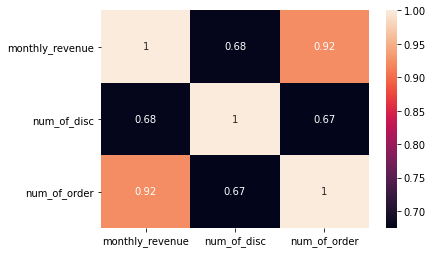

In [68]:
sns.heatmap(disc_rev.corr(method='spearman'), annot=True)